In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
import colorsys

# --- Color utilities ---
def generate_distinct_colors(n, bright=True):
    if n == 0: return []
    brightness = 1.0 if bright else 0.7
    colors = []
    for i in range(n):
        hue = i / n
        rgb = colorsys.hsv_to_rgb(hue, 0.7, brightness)
        colors.append(rgb)
    return colors

def darker_color(color, factor=0.6):
    rgba = to_rgba(color)
    return (rgba[0]*(1-factor), rgba[1]*(1-factor), rgba[2]*(1-factor), rgba[3])

# --- Global style ---
plt.rcParams.update({
    'font.size': 16,
    'font.weight': 'bold',
    'axes.labelweight': 'bold',
    'axes.titlesize': 16,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'axes.grid': True,
    'grid.linestyle': '--',
    'grid.alpha': 0.4
})

def calculate_cagr(data: pd.DataFrame) -> dict:
    cagr_results = {}
    data = data.sort_values(by=['Year'])
    # Get a list of unique product codes
    product_codes = data['ProductCode'].unique()

    for product in product_codes:
        product_data = data[data['ProductCode'] == product]
        
        # Separate data for China and the World
        china_data = product_data[product_data['PartnerISO3'] == 'CHN'].sort_values('Year')
        world_data = product_data[product_data['PartnerISO3'] == 'WLD'].sort_values('Year')
        
        cagr_values = {}

        # Calculate CAGR for China
        if len(china_data) > 1:
            start_value = china_data['TradeValue in 1000 USD'].iloc[0]
            end_value = china_data['TradeValue in 1000 USD'].iloc[-1]
            start_year = china_data['Year'].iloc[0]
            end_year = china_data['Year'].iloc[-1]
            
            num_years = end_year - start_year
            if num_years > 0 and start_value > 0:
                cagr = (end_value / start_value) ** (1 / num_years) - 1
                cagr_values['China'] = cagr

        # Calculate CAGR for the World
        if len(world_data) > 1:
            start_value = world_data['TradeValue in 1000 USD'].iloc[0]
            end_value = world_data['TradeValue in 1000 USD'].iloc[-1]
            start_year = world_data['Year'].iloc[0]
            end_year = world_data['Year'].iloc[-1]

            num_years = end_year - start_year
            if num_years > 0 and start_value > 0:
                cagr = (end_value / start_value) ** (1 / num_years) - 1
                cagr_values['World'] = cagr
        
        if cagr_values:
            cagr_results[product] = cagr_values

    return cagr_results

In [3]:
data = pd.read_csv(r'C:\Users\Investigador\binu\data\ChapterImportWLD_CHN.csv')
data

,ReporterISO3,ProductCode,PartnerISO3,Year,TradeFlowCode,TradeValue in 1000 USD
0,IND,1,CHN,2005,5,82.248
1,IND,1,CHN,2006,5,16.948
2,IND,1,CHN,2007,5,144.013
3,IND,1,CHN,2008,5,422.781
4,IND,1,CHN,2009,5,485.277
...,...,...,...,...,...,...
4174,IND,89,CHN,2014,5,1283239.215
4175,IND,89,CHN,2015,5,877552.312
4176,IND,89,CHN,2016,5,1778820.254
4177,IND,89,CHN,2017,5,832165.114


In [4]:
import_chapters = [27, 29, 31, 39, 50, 72, 84, 85, 89, 90]
cagr_values = calculate_cagr(data)
cagr_values = pd.DataFrame(cagr_values)
cagr_values = cagr_values.T
cagr_values = cagr_values.reset_index()
def map_importance(value):
    if value in import_chapters:
        return 1
    return 0
cagr_values['import'] = cagr_values['index'].map(map_importance)

import_cagr_df = cagr_values[cagr_values['import'] == 1]
import_cagr_df

,index,China,World,import
8,89,0.213232,0.081316,1
11,31,0.215594,0.138956,1
12,90,0.203329,0.110469,1
20,27,0.027582,0.115886,1
31,84,0.222798,0.113837,1
33,72,0.282845,0.121841,1
35,29,0.149616,0.109430,1
53,85,0.201433,0.130573,1
72,50,-0.051037,-0.015326,1
88,39,0.257707,0.149881,1


In [5]:
china_data = data[data['PartnerISO3']=='CHN']
world_data = data[data['PartnerISO3']=='WLD']
china_data

,ReporterISO3,ProductCode,PartnerISO3,Year,TradeFlowCode,TradeValue in 1000 USD
0,IND,1,CHN,2005,5,82.248
1,IND,1,CHN,2006,5,16.948
2,IND,1,CHN,2007,5,144.013
3,IND,1,CHN,2008,5,422.781
4,IND,1,CHN,2009,5,485.277
...,...,...,...,...,...,...
4174,IND,89,CHN,2014,5,1283239.215
4175,IND,89,CHN,2015,5,877552.312
4176,IND,89,CHN,2016,5,1778820.254
4177,IND,89,CHN,2017,5,832165.114


In [6]:
merged = pd.merge(
    world_data[['ProductCode', 'Year', 'TradeValue in 1000 USD']],
    china_data[['ProductCode', 'Year', 'TradeValue in 1000 USD']],
    on=['ProductCode', 'Year'],
    suffixes=('_world', '_china')
).sort_values(by=['Year', 'ProductCode'])

merged['ChinaShare'] = (merged['TradeValue in 1000 USD_china']/merged['TradeValue in 1000 USD_world'])*100



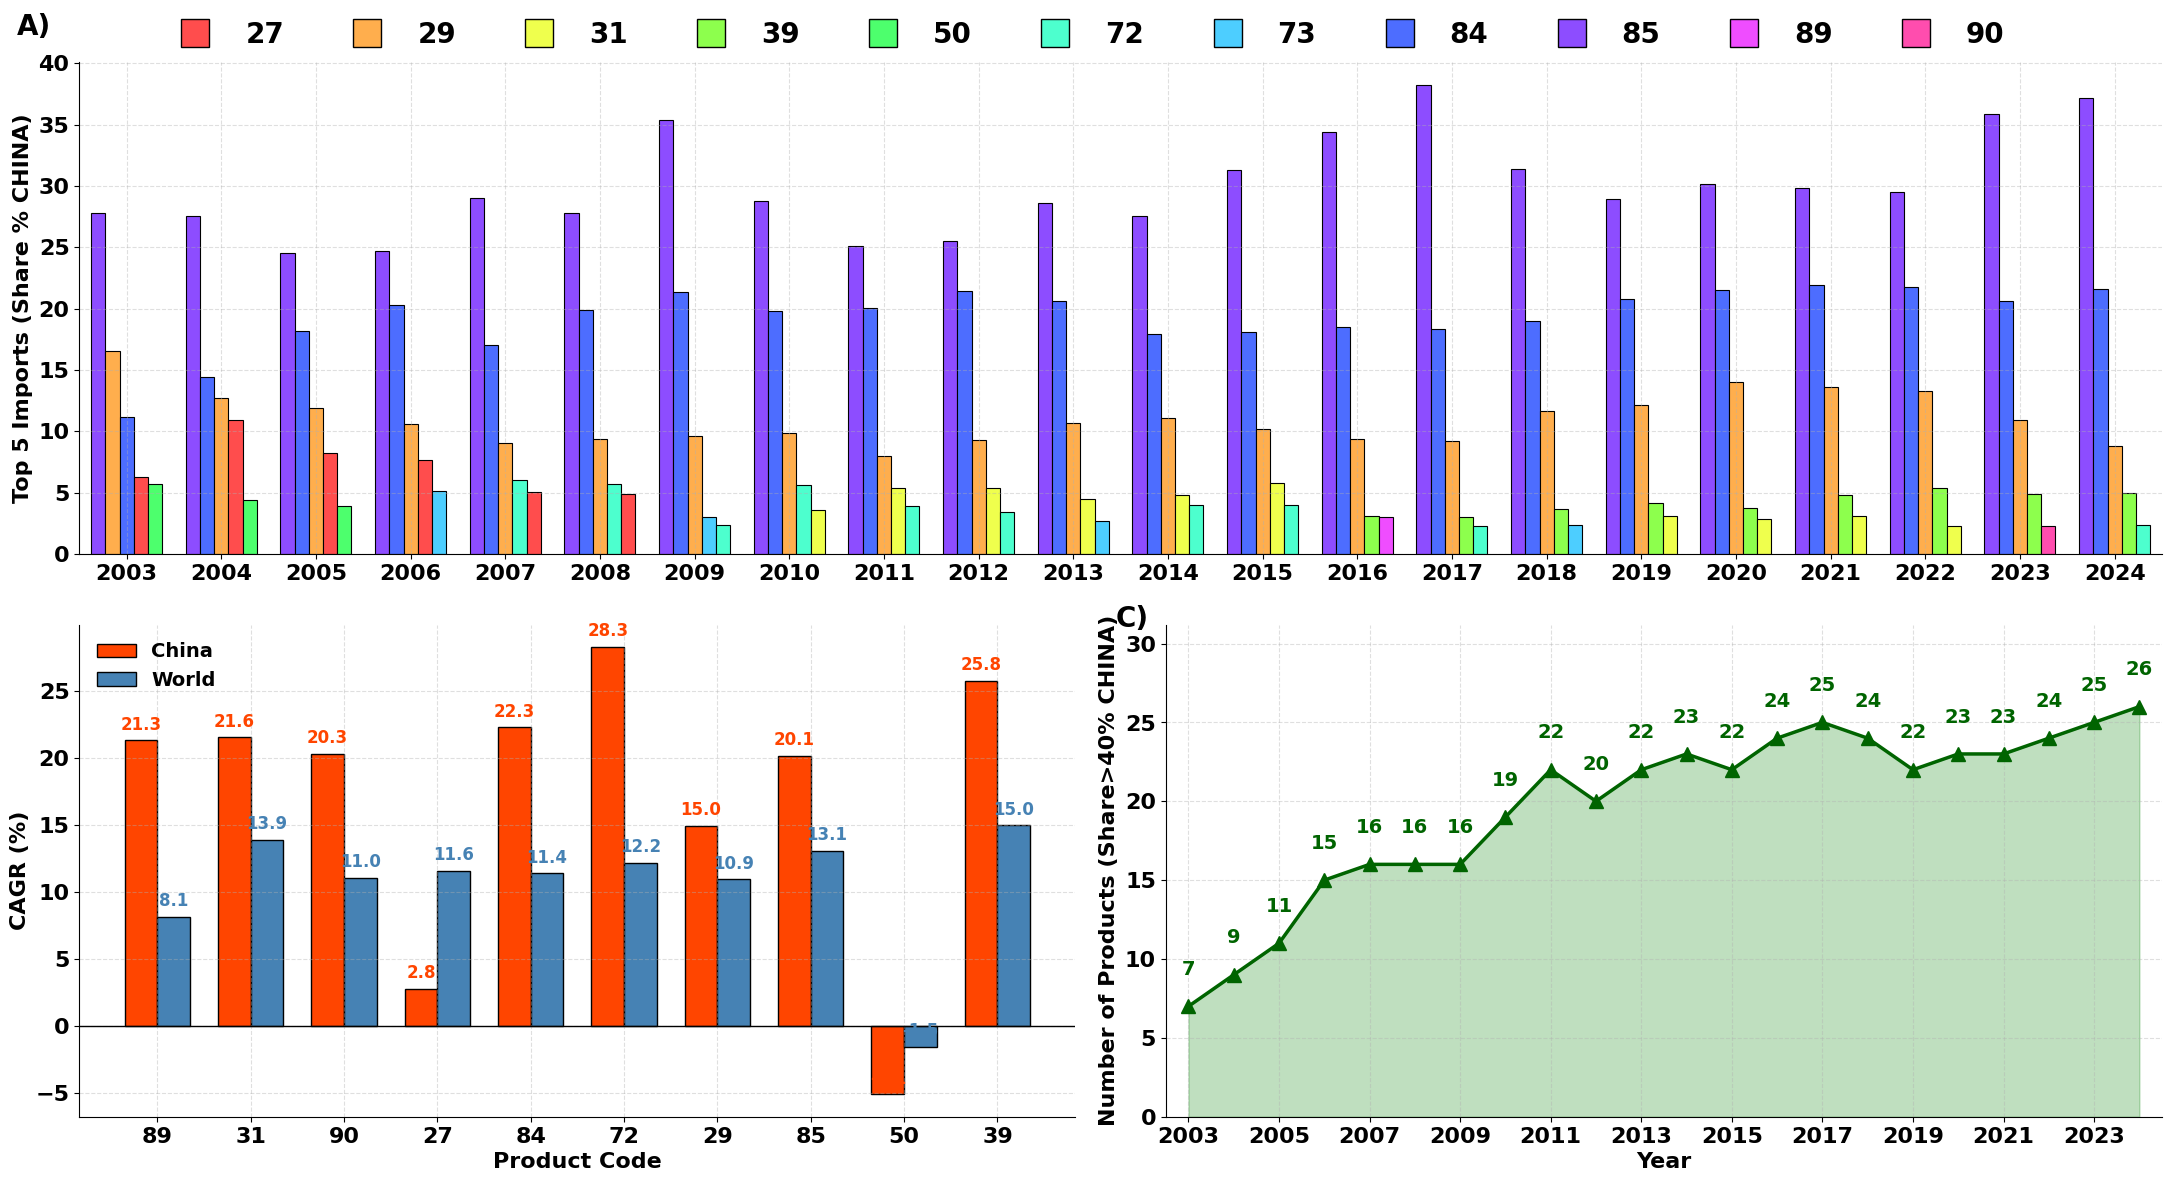

In [9]:
df = merged.copy()
# --- Clean column names and calculate China share ---
df.rename(columns={
    'TradeValue in 1000 USD_world': 'TradeValue_World',
    'TradeValue in 1000 USD_china': 'TradeValue_China'
}, inplace=True)

df['ChinaShare_percent'] = (df['TradeValue_China'] / df['TradeValue_World'].replace(0, np.nan) * 100).fillna(0)

# --- Panel A: Top 5 Products ---
total_china_per_year = df.groupby("Year")["TradeValue_China"].sum()
top5 = (
    df.groupby(["Year", "ProductCode"])["TradeValue_China"]
    .sum()
    .groupby(level=0, group_keys=False)
    .nlargest(5)
    .reset_index()
)

# --- Panel B: China's Overall Share of World Imports ---
macro_trends = df.groupby('Year')[['TradeValue_World', 'TradeValue_China']].sum()
macro_trends['China_Overall_Share'] = (macro_trends['TradeValue_China'] / macro_trends['TradeValue_World'].replace(0, np.nan) * 100).fillna(0)

# --- Panel C: High Dependency Count ---
HIGH_DEPENDENCY_THRESHOLD = 40
high_dependency_df = df[df['ChinaShare_percent'] > HIGH_DEPENDENCY_THRESHOLD]
high_dependency_counts = high_dependency_df.groupby('Year').size()

# --- Visualization setup ---
years = sorted(df["Year"].unique())
unique_top_products = sorted(top5["ProductCode"].unique())
palette = generate_distinct_colors(len(unique_top_products))
colors = {c: palette[i] for i, c in enumerate(unique_top_products)}

bar_width = 0.15
fig = plt.figure(figsize=(22, 12))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], width_ratios=[1, 1])
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# --- A) Import volume share of top 5 products from China ---
for idx, year in enumerate(years):
    year_data = top5[top5["Year"] == year]
    if year_data.empty: 
        continue
    
    n_products_year = len(year_data)
    offsets = np.linspace(-(n_products_year - 1) / 2, (n_products_year - 1) / 2, n_products_year) * bar_width
    
    for i, (_, row) in enumerate(year_data.iterrows()):
        share_value = row["TradeValue_China"] / total_china_per_year.get(year, 1) * 100
        color = colors.get(row["ProductCode"], "gray")
        ax1.bar(idx + offsets[i], share_value, width=bar_width, color=color, edgecolor='black', linewidth=0.8)

ax1.set_ylabel('Top 5 Imports (Share % CHINA)')
ax1.set_xticks(np.arange(len(years)))  # tick positions
ax1.set_xticklabels(years, rotation=0, ha='center')  # center-align
ax1.spines[['top', 'right']].set_visible(False)
ax1.set_xlim(-0.5, len(years) - 0.5)
ax1.text(-0.03, 1.1, 'A)', transform=ax1.transAxes, fontsize=20, fontweight='bold', va='top')

# --- B) China's Share of Total World Imports ---
cagr_data = import_cagr_df

bar_width = 0.35
x = np.arange(len(cagr_data))

bars_china = ax2.bar(x - bar_width/2, cagr_data['China']*100, width=bar_width,
        color='orangered', label='China', edgecolor='black')
bars_world = ax2.bar(x + bar_width/2, cagr_data['World']*100, width=bar_width,
        color='steelblue', label='World', edgecolor='black')

for bar in bars_china:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.1f}', 
             ha='center', va='bottom', fontsize=12, color='orangered')
for bar in bars_world:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.1f}', 
             ha='center', va='bottom', fontsize=12, color='steelblue')


ax2.axhline(0, color='black', linewidth=1)
ax2.set_xticks(x)
ax2.set_xticklabels(cagr_data['index'], rotation=0)
ax2.set_xlabel('Product Code')
ax2.set_ylabel('CAGR (%)')
ax2.spines[['top', 'right']].set_visible(False)
ax2.legend(frameon=False, fontsize=14)

# --- C) High-Dependency Product Count ---
ax3.plot(high_dependency_counts.index, high_dependency_counts.values, marker='^', markersize=10,
         color='darkgreen', linewidth=2.5)
ax3.fill_between(high_dependency_counts.index, high_dependency_counts.values,
                 color='green', alpha=0.25)
for year, val in high_dependency_counts.items():
    ax3.text(year, val + 2, f'{int(val)}', ha='center', fontsize=14, color='darkgreen')

ax3.set_xlabel('Year')
ax3.set_ylabel('Number of Products (Share>40% CHINA)')
ax3.spines[['top', 'right']].set_visible(False)
ax3.set_ylim(0, max(high_dependency_counts.values) * 1.2)
ax3.text(-0.05, 1.04, 'C)', transform=ax3.transAxes, fontsize=20, fontweight='bold', va='top')

# --- Legend for Plot A ---
handles = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=colors[c], markeredgecolor='black', markersize=20) for c in unique_top_products]
fig.legend(handles, unique_top_products, fontsize=20, loc='upper center',
           bbox_to_anchor=(0.5, 1.0), ncol=min(len(unique_top_products), 11), frameon=False)

# --- X-tick adjustments for Panels B and C ---
step = max(1, len(years) // 8)
display_years = years[::step]
#ax2.set_xticks(display_years)
#ax2.set_xticklabels(display_years, rotation=0, ha='center')
ax3.set_xticks(display_years)
ax3.set_xticklabels(display_years, rotation=0, ha='center')

#ax2.set_xlim(min(years)-0.5, max(years)+0.5)
ax3.set_xlim(min(years)-0.5, max(years)+0.5)

plt.tight_layout()
plt.savefig('Figure_3_ABC.png', dpi=800)
plt.show()



In [ ]:
import_cagr_df

,index,China,World,import
8,89,0.213232,0.081316,1
11,31,0.215594,0.138956,1
12,90,0.203329,0.110469,1
20,27,0.027582,0.115886,1
31,84,0.222798,0.113837,1
33,72,0.282845,0.121841,1
35,29,0.149616,0.109430,1
53,85,0.201433,0.130573,1
72,50,-0.051037,-0.015326,1
88,39,0.257707,0.149881,1


In [ ]:
pivot_df = merged.pivot(index='ProductCode', columns='Year', values='TradeValue in 1000 USD_china')
pivot_df

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
ProductCode,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,82.248,16.948,144.013,422.781,485.277,453.360,694.956,262.380,...,NaN,NaN,72.200,0.156,6.058,39.656,10.335,56.506,66.471,182.747
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.494,23.442,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.505,384.282,3.203,141.311,572.034,85.975,55.140,397.798,576.764,282.826,...,37.691,384.917,326.374,926.068,1145.922,1798.708,8022.255,13147.311,803.346,712.245
4,406.702,2209.813,1.422,451.410,2179.768,2464.878,2286.266,3816.161,9710.816,2605.037,...,590.280,5.490,1.567,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5270.669,5888.263,6765.056,11469.555,9670.492,5153.895,7193.025,6245.649,18875.629,15281.437,...,8734.148,4670.707,2814.768,2029.848,3918.262,4748.707,7029.293,8337.549,5293.288,4729.569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,20.189,93.005,21.533,20.058,NaN,12.370,164.832,39.355,594.090,1219.254,...,31.439,18.424,73.387,18.791,76.976,54.333,1.244,478.044,780.746,317.872
94,23398.950,49749.516,89524.184,150377.291,234744.202,278087.335,241775.572,369618.735,521268.299,558032.482,...,913718.064,879001.399,1101879.686,1047869.693,967793.517,572159.727,716495.963,794369.026,769377.913,853611.452
95,22901.348,32753.562,56778.576,92195.124,99221.429,128525.392,125032.412,214921.254,303706.170,319512.757,...,442365.020,415296.415,442524.127,490794.062,427989.111,294789.568,250509.307,247702.126,370352.698,353220.395


Text(0.5, 1.0, 'Heatmap of China Import Share by Product Code and Year')

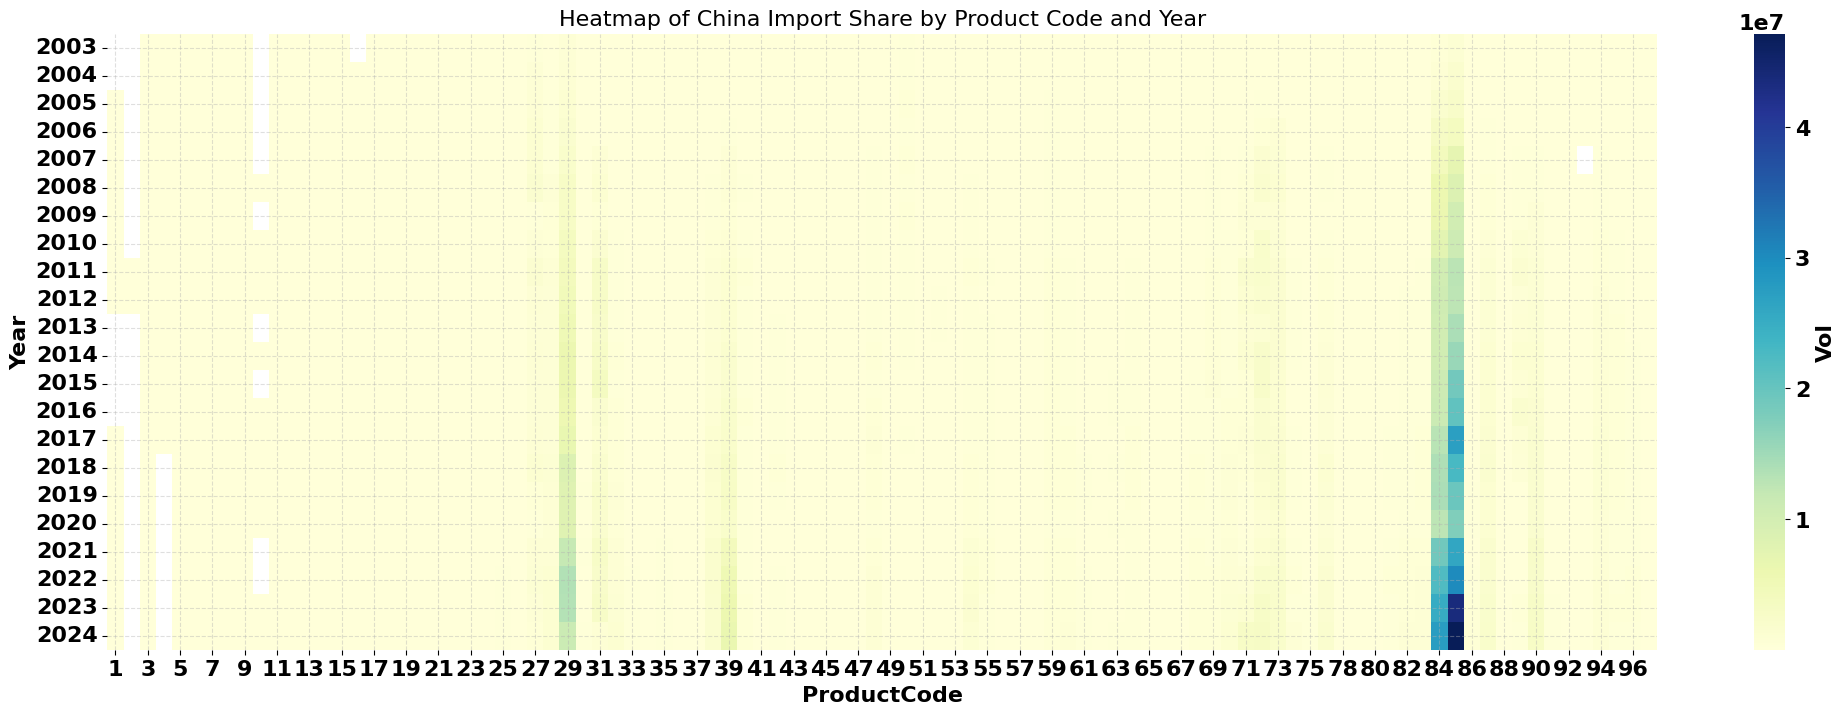

In [ ]:
plt.figure(figsize=(25, 8)) 
sns.heatmap(pivot_df.T, cmap='YlGnBu', cbar_kws={'label': 'Vol'})
plt.title('Heatmap of China Import Share by Product Code and Year')

In [ ]:

df = merged.copy()
# Rename columns for easier access (removing spaces and special characters)
df.rename(columns={
    'TradeValue in 1000 USD_world': 'TradeValue_World',
    'TradeValue in 1000 USD_china': 'TradeValue_China'
}, inplace=True)


# Ensure data types are correct for sorting and plotting
df['Year'] = df['Year'].astype(int)
df['ProductCode'] = df['ProductCode'].astype(str)
df['TradeValue_China'] = pd.to_numeric(df['TradeValue_China'], errors='coerce')


print("--- Data Loading and Preparation Complete ---")
df.head()




--- Data Loading and Preparation Complete ---


,ProductCode,Year,TradeValue_World,TradeValue_China,ChinaShare
18,3,2003,9868.908,0.505,0.005117
40,4,2003,29680.638,406.702,1.370260
55,5,2003,12752.369,5270.669,41.330901
77,6,2003,2149.501,184.747,8.594879
99,7,2003,592785.778,35904.047,6.056833


Text(0.5, 1.0, 'Heatmap of China Import Share by Product Code and Year')

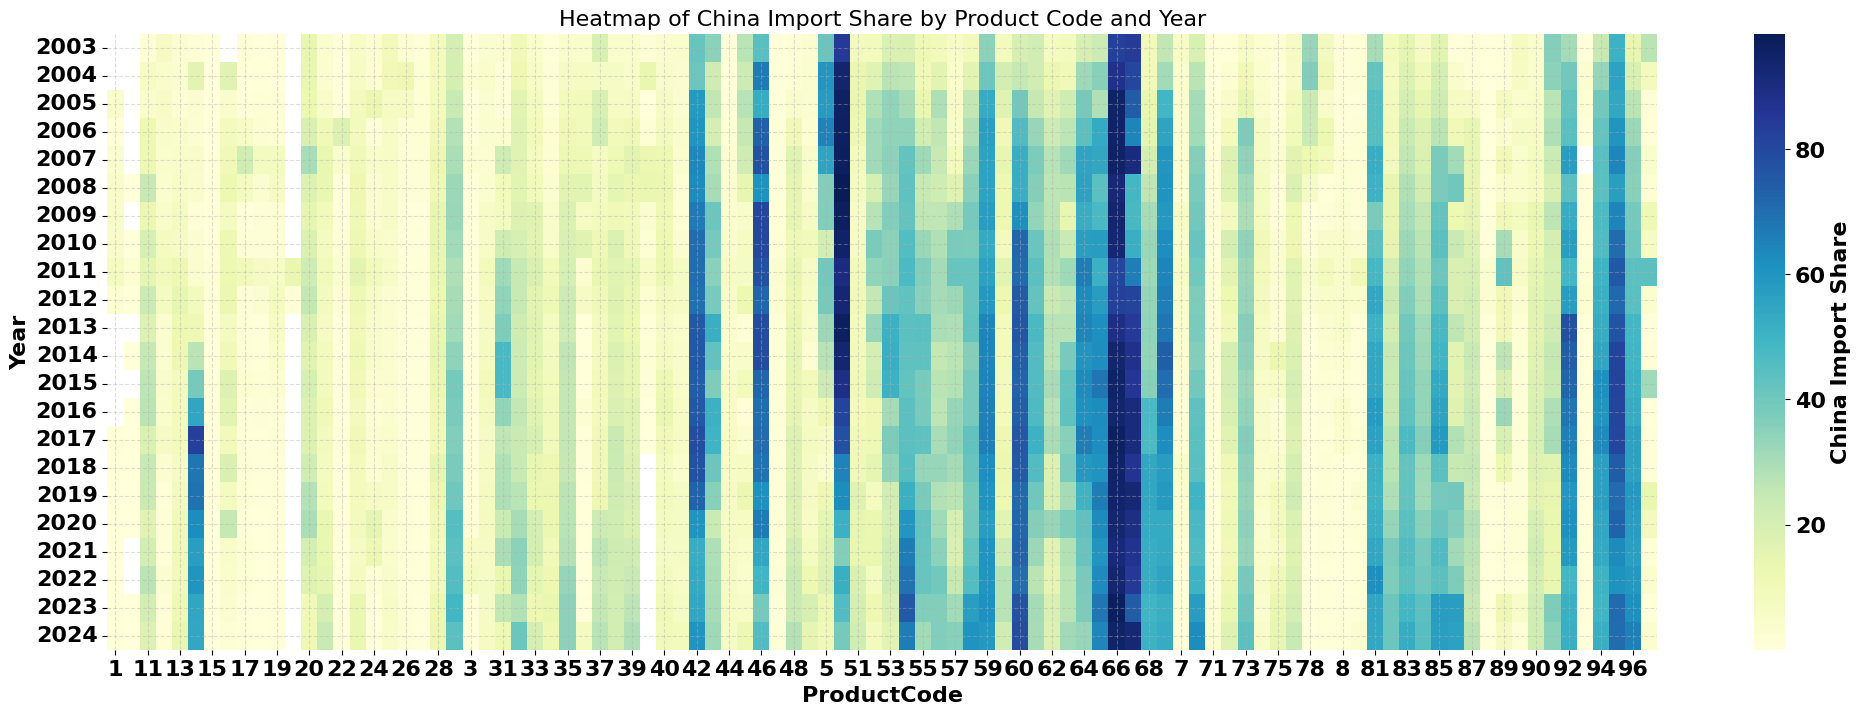

In [ ]:
china_share = df.pivot(index='ProductCode', columns='Year', values='ChinaShare')
plt.figure(figsize=(25, 8)) 
sns.heatmap(china_share.T, cmap='YlGnBu', cbar_kws={'label': 'China Import Share'})
plt.title('Heatmap of China Import Share by Product Code and Year')